In [3]:
import numpy as np
from scipy.optimize import curve_fit
popt, pcov = [0],[0]

In [4]:
def decibelFrequency(x,y):
    popt=fittingCurve(x,y)
    y0=max(y)/np.sqrt(2)
    x=findx(y0,popt)
    return x

In [51]:
def findx(y0,popt):
    x0,dx=0,10
    approx=y0-f(x0,popt)
    flag=True
    while dx>1e-5:
        if approx<0:#What decides to calculate up or down
            x0=x0+dx
        else:
            x0=x0-dx
            dx=dx/10
            x0=x0+dx
        
        approx=y0-f(x0,popt)
    return x0

In [52]:
def func(x, a, b):
    #print(x)
    return a*np.exp(b * x)
def fittingCurve(xD,yD):
    popt, pcov = curve_fit(funcPoly, xD, yD)
    return popt
def f(x,popt):
    return funcPoly(x,*popt)

In [53]:
xD,yD=[100,200,500,1000,2000,5000,10000,12000,15000],[2.4,2.4,2.4,2.4,2.4,2.4,1.8,1.7,1.6]


In [54]:
decibelFrequency(xD,yD)

11501.316509999999

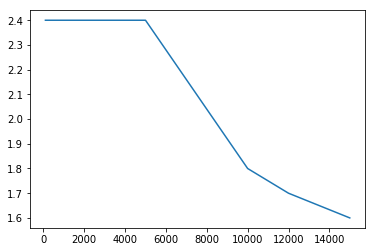

In [46]:
import matplotlib.pyplot as plt
plt.plot(xD,yD)
#plt.plot(xD,f(xD,fittingCurve(xD,yD)))
plt.show()

In [49]:
xD=np.linspace(0,4,1000)
yD=funcExp(xD,2,0.94)
np.random.seed(1729)
y_noise = 1.5 * np.random.normal(size=xD.size)
yD = yD + y_noise
decibelFrequency(xD,yD)

3.6505100000000006

In [37]:
def funcExp(x, a, b):
    #print(x)
    return a*np.exp(b * x)
def funcMExp(x, a, b, c):
    return a * np.exp(-b * x)
def funcSin(x, a, b): 
    return a * np.sin(b * x) 
def funcCos(x, a, b): 
    return a * np.cos(b * x) 
def funcLin(x,a,b):
    return x*a+b
def funcPoly(x,a,b,c,d,e):
    return a+b*x+c*x**2+d*x**3+e*x**4



def fittingCurve(xD,yD):
    popt, pcov = curve_fit(func, xD, yD)
    return pcov
def f(x,popt):
    return func(x,*popt)

popt, pcov = curve_fit(funcExp, xD, yD)
print("e -> ",np.linalg.det(pcov))
popt, pcov = curve_fit(funcMExp, xD, yD)
print("e- -> ",np.linalg.det(pcov))
popt, pcov = curve_fit(funcSin, xD, yD)
print("sin -> ",np.linalg.det(pcov))
popt, pcov = curve_fit(funcCos, xD, yD)
print("cos -> ",np.linalg.det(pcov))
popt, pcov = curve_fit(funcLin, xD, yD)
print("st line -> ",np.linalg.det(pcov))
popt, pcov = curve_fit(funcPoly, xD, yD)
print("poly -> ",np.linalg.det(pcov))

e ->  7.591570486056122e-11
e- ->  nan
sin ->  0.0767974218749215
cos ->  0.0003557547657336715
st line ->  0.005747928988817784
poly ->  1.4269016026340065e-14


In [38]:
popt

array([ 2.18771434, -0.43961536,  4.57615636, -1.82421342,  0.50118751])

In [50]:
xD,yD=[100,200,500,1000,2000,5000,10000,12000,15000,18000,20000,50000],[0,0.05,0.07,0.15,0.3,0.7,1.2,1.4,1.6,1.8,1.8,1.8]
print(decibelFrequency(xD,yD))

10520.336909999996
